## Customer Segmentation using vaious Clustering Algorithms

In [1]:
# importing basic libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/Mall_Customers.csv')
print('There are {} rows and {} columns in our dataset'.format(data.shape[0],data.shape[1]))

There are 200 rows and 5 columns in our dataset


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Exploratory Data Analysis

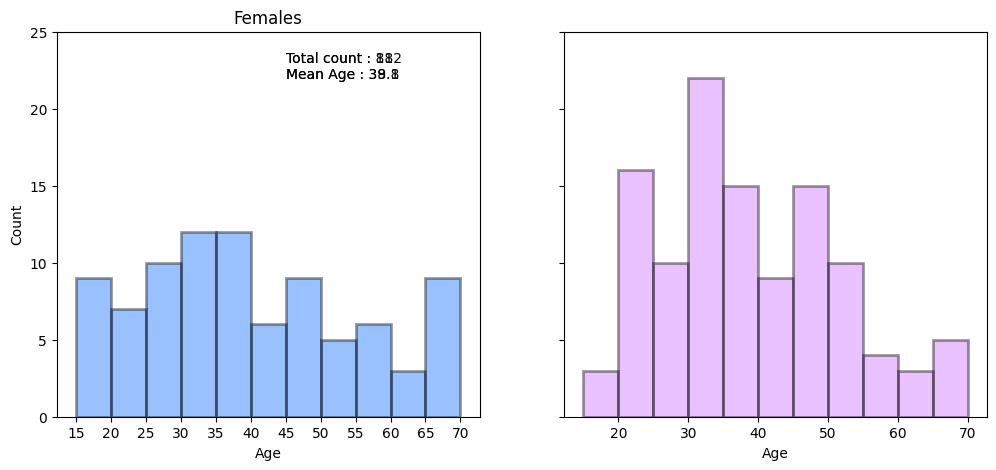

In [7]:
males_age = data[data['Gender'] == 'Male']['Age'] # subset with males age
females_age = data[data['Gender'] == 'Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), sharey = True)
sns.distplot(males_age,bins=age_bins, kde=False, color = '#0066ff', ax=ax1, hist_kws=dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "Total count : {}".format(males_age.count()))
ax1.text(45,22, "Mean Age : {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age,bins=age_bins, kde=False, color = '#cc66ff', ax=ax2, hist_kws=dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(age_bins)
ax1.set_title('Females')
ax1.set_ylabel('Count')
ax1.text(45,23, "Total count : {}".format(females_age.count()))
ax1.text(45,22, "Mean Age : {:.1f}".format(females_age.mean()))

plt.show()


In [8]:
print('Kolmogorov-Smirnov test p-vale : {:.2f}'.format(stats.ks_2samp(males_age,females_age)[1]))

Kolmogorov-Smirnov test p-vale : 0.49


The average age of male customers is slightly higher than female ones (39.8 versus 38.1). Distribution of male age is more uniform than females, where we can observe that the biggest age group is 30-35 years old. Kolmogorov-Smirnov test shows that the differences between these two groups are statistically insignificant.

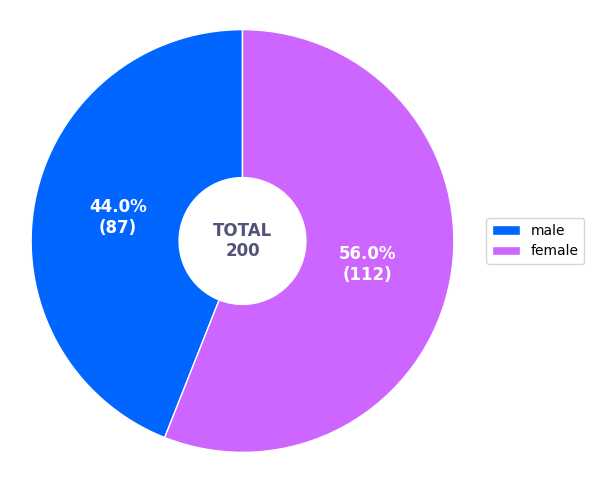

In [9]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct,absolute)

sizes = [males_age.count(), females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize = (6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct,sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7,edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc = 'center right',
           bbox_to_anchor = (1.2,0,0.05,1))

plt.text(0,0,'TOTAL\n{}'.format(data['Age'].count()),
         weight='bold',size=12,color='#52527a',
         ha = 'center',va='center')

plt.setp(autotexts,size=12,weight='bold')
ax1.axis('equal') # Equal aspect ratio
plt.show()

There are slightly more female customers than male ones (112 vs 87). Females are 56% of total customers.

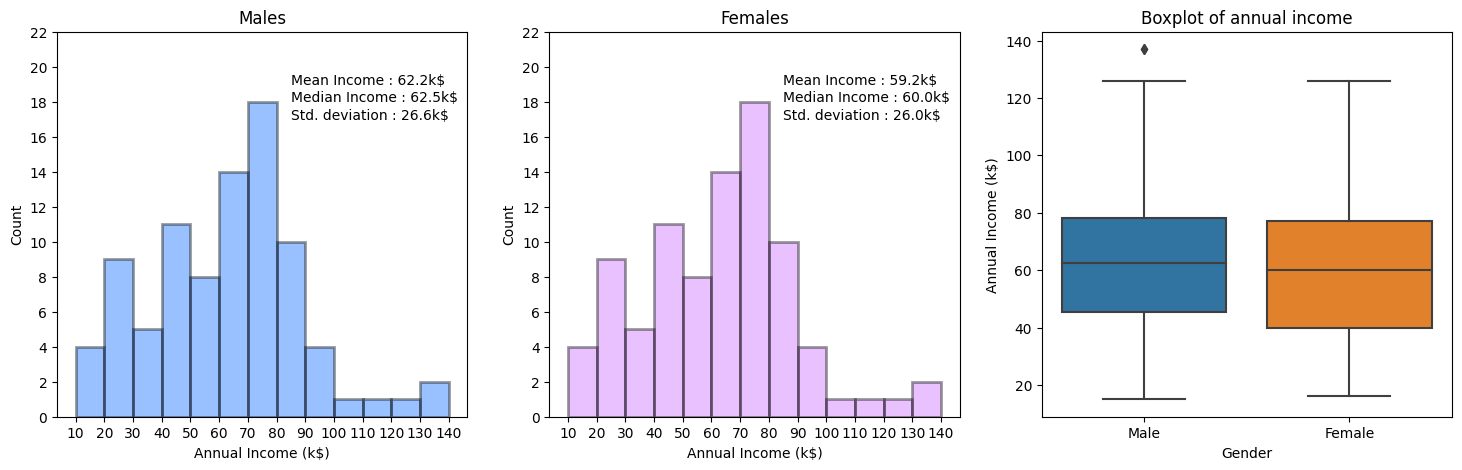

In [10]:
males_income = data[data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = data[data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))
sns.distplot(males_income,bins = my_bins, kde=False, color='#0066ff',ax=ax1,hist_kws=dict(edgecolor="k",linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19,"Mean Income : {:.1f}k$".format(males_income.mean()))
ax1.text(85,18,"Median Income : {:.1f}k$".format(males_income.median()))
ax1.text(85,17,"Std. deviation : {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(males_income,bins = my_bins, kde=False, color='#cc66ff',ax=ax2,hist_kws=dict(edgecolor="k",linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19,"Mean Income : {:.1f}k$".format(females_income.mean()))
ax2.text(85,18,"Median Income : {:.1f}k$".format(females_income.median()))
ax2.text(85,17,"Std. deviation : {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender',y="Annual Income (k$)", data=data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [11]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income,females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


Mean income of males is higher than females (62.2 k$ vs 59.2k$). Also median income of male customers (62.5k$) is higher than the female ones (60k$).
Standard deviation is similar for both groups. There is one outlier in male group with an annual income of about 140k$. K-S test shows that these two groups are not statistically different.

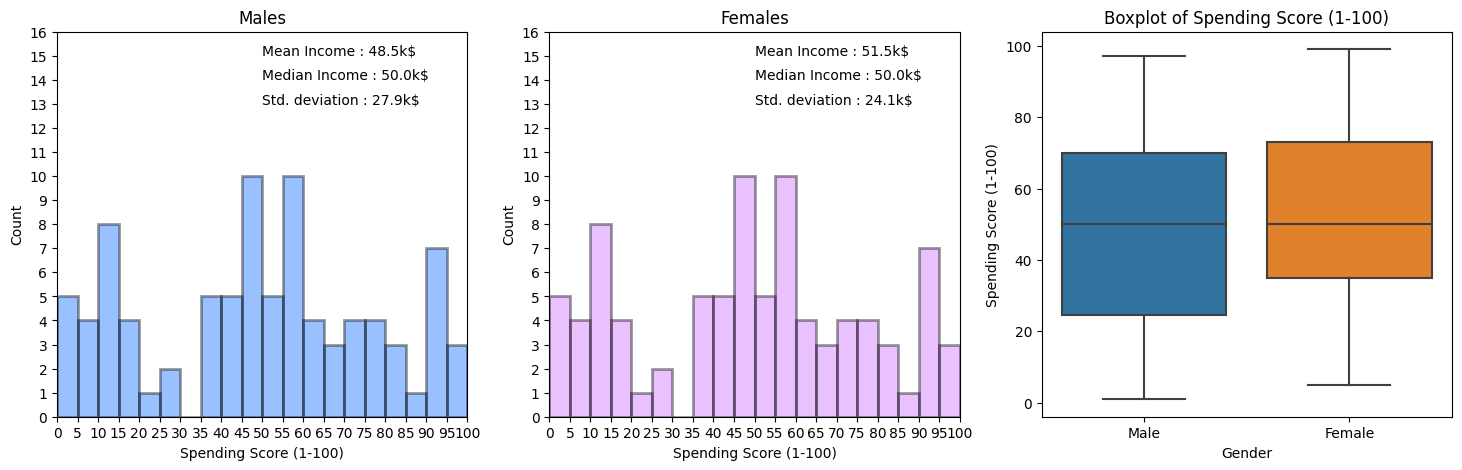

In [12]:
males_spending = data[data['Gender']=='Male']['Spending Score (1-100)'] # subset with males income
females_spending = data[data['Gender']=='Female']['Spending Score (1-100)'] # subset with females income

spending_bins = range(0,105,5)

# males histogram
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))
sns.distplot(males_spending,bins = spending_bins, kde=False, color='#0066ff',ax=ax1,hist_kws=dict(edgecolor="k",linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15,"Mean Income : {:.1f}k$".format(males_spending.mean()))
ax1.text(50,14,"Median Income : {:.1f}k$".format(males_spending.median()))
ax1.text(50,13,"Std. deviation : {:.1f}k$".format(males_spending.std()))

# females histogram
sns.distplot(males_spending,bins = spending_bins, kde=False, color='#cc66ff',ax=ax2,hist_kws=dict(edgecolor="k",linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15,"Mean Income : {:.1f}k$".format(females_spending.mean()))
ax2.text(50,14,"Median Income : {:.1f}k$".format(females_spending.median()))
ax2.text(50,13,"Std. deviation : {:.1f}k$".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender',y="Spending Score (1-100)", data=data, ax=ax3)
ax3.set_title('Boxplot of Spending Score (1-100)')
plt.show()

In [13]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending,females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


A mean spending score for women (51.5) is higher than men (48.5). The K-S test p-value indicated that there is no evidence to reject the null-hypothesis, however the evidence is not so strong in previous comparisons. Next, we will calculate the median income for all age groups.

In [14]:
medians_by_age_group = data.groupby(['Gender',pd.cut(data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender','Age_group'])
medians_by_age_group.reset_index(inplace=True)

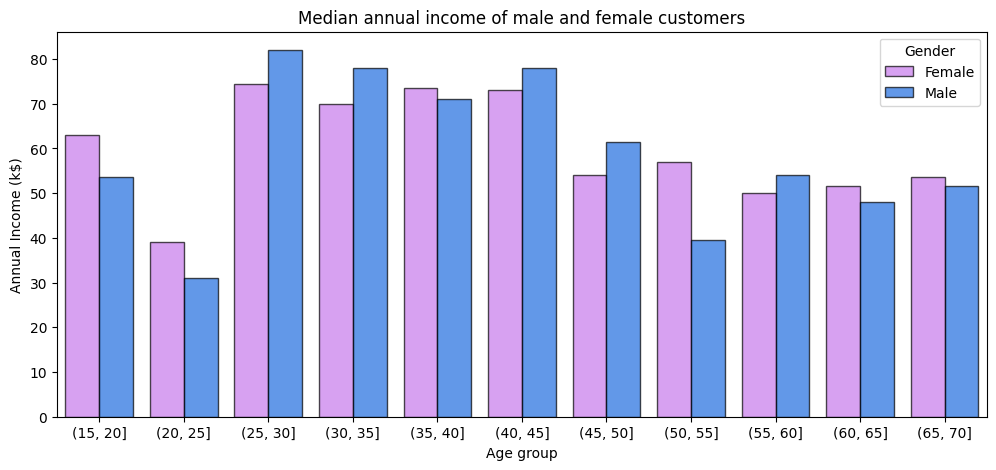

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y = 'Annual Income (k$)', hue='Gender', data = medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha = 0.7, edgecolor = 'k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

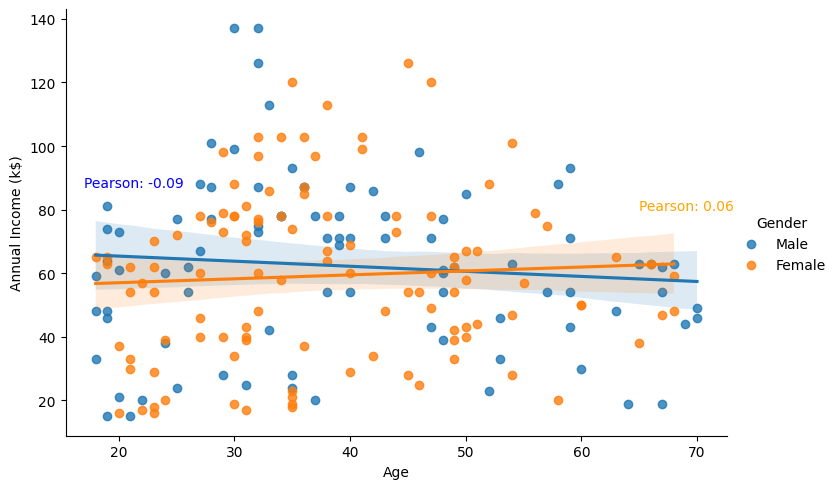

In [16]:
# calculating Peason's correlations

from scipy.stats.stats import pearsonr
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x='Age', y='Annual Income (k$)', data=data, hue='Gender',
           aspect=1.5)

plt.text(17,87,'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80,'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

There is a negligible correlation between age and annual income of customers for both sex groups

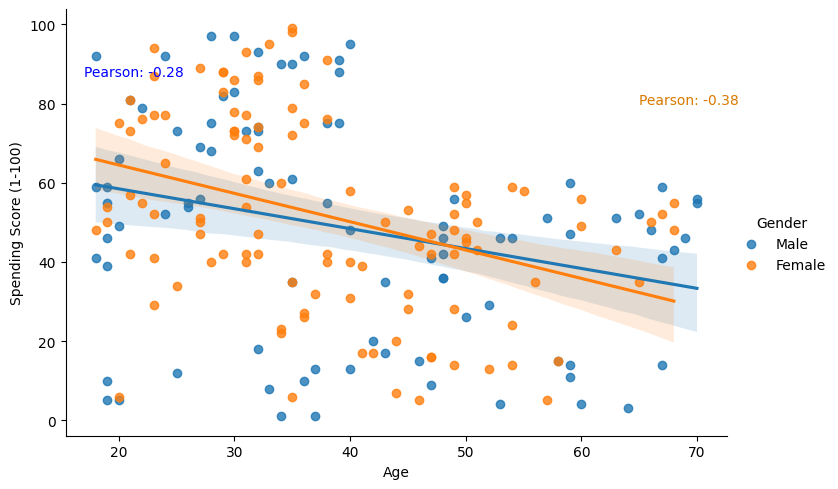

In [17]:
# calculating Peason's correlations

corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=data, hue='Gender',
           aspect=1.5)

plt.text(17,87,'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80,'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

There is a week negative correlation (0.5) between age anf spending score for both sex groups

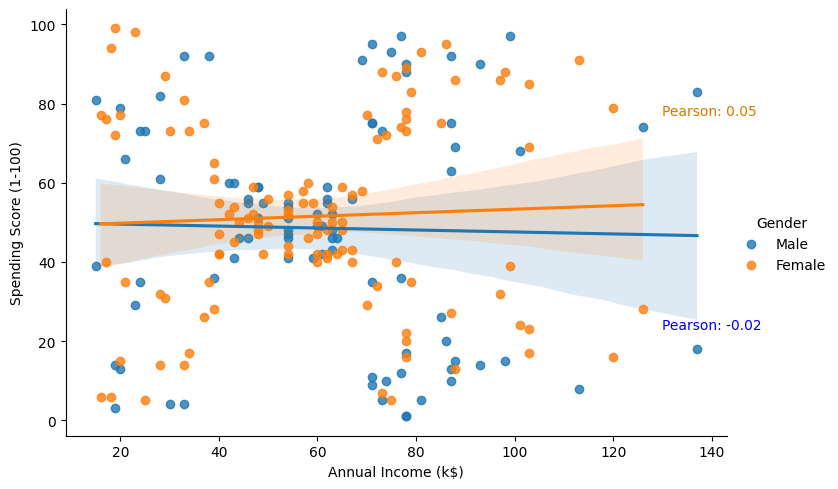

In [18]:
# calculating Peason's correlations

corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender',
           aspect=1.5)

plt.text(130,23,'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77,'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

There is a negligible correlation between annual income and spending score of customers for both sex groups

A bar chart above shows that the most wealthy customers are in age of 25-45 years old. The biggest difference between women and men is visible in age groups 25-30 (male more rich) and 50-55 (female more rich).

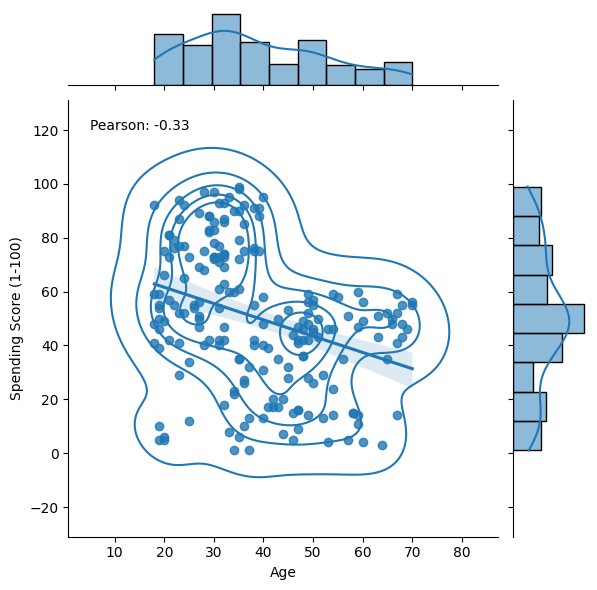

In [19]:
from scipy.stats import pearsonr 

# Calculating Pearson's correlation
corr, _ = pearsonr(data['Age'], data['Spending Score (1-100)'])

jp = (sns.jointplot(x=data['Age'], y=data['Spending Score (1-100)'], data = data,
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(5,120, 'Pearson: {:.2f}'.format(corr))
plt.show()



### Clustering

1. KMeans
2. DBSCAN
3. MeanShift
4. Agglomerative

### KMEANS

In [20]:
from sklearn.cluster import KMeans

From clustering only numeric columns are used.

The graph above shows that there are some outliers - these points do not meet distance and minimum samples requirements to be recognised as a cluster

In [21]:
X_numerics = data[['Age','Annual Income (k$)','Spending Score (1-100)']] # subset with numeric variables inly

In order to find an appropriate number of clusters, the elbow method will be used. In this method for this case, the inertia for a number of clusters between 2 and 10 will be calculated. The rule is to choose the number of clusters where you see a kink or "an elbow" in the grpah

In [22]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = []
s_scores = [] #silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_) # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics,KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

The graph below shows the inertia for selected range of clusters

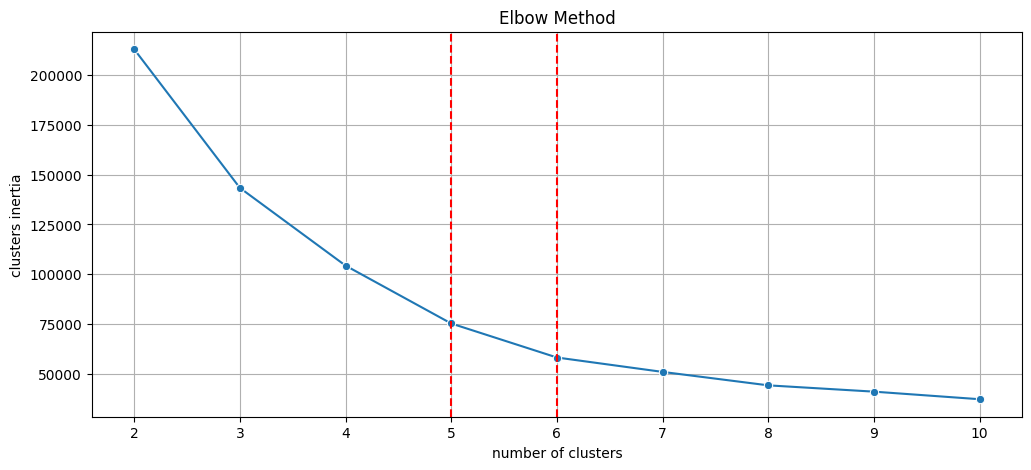

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters,y=clusters_inertia,marker='o', ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('clusters inertia')
ax.axvline(5, ls='--',c='red')
ax.axvline(6, ls='--',c='red')
plt.grid()
plt.show()

There is no clear "elbow" visible. A choice of 5 or 6 clusters seems tobe fair. Let's see the silhouette score.

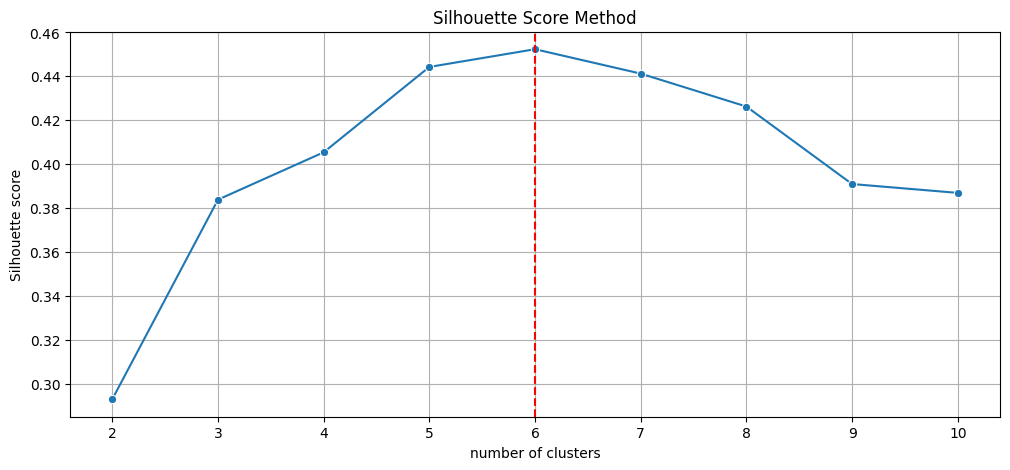

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters,y=s_scores,marker='o', ax=ax)
ax.set_title('Silhouette Score Method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('Silhouette score')
ax.axvline(6, ls='--',c='red')
plt.grid()
plt.show()

Silhouette score method indicates the best options would be respectively 6 or 5 clusters. Let's compare both.

#### 5 clusters

In [25]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K_means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

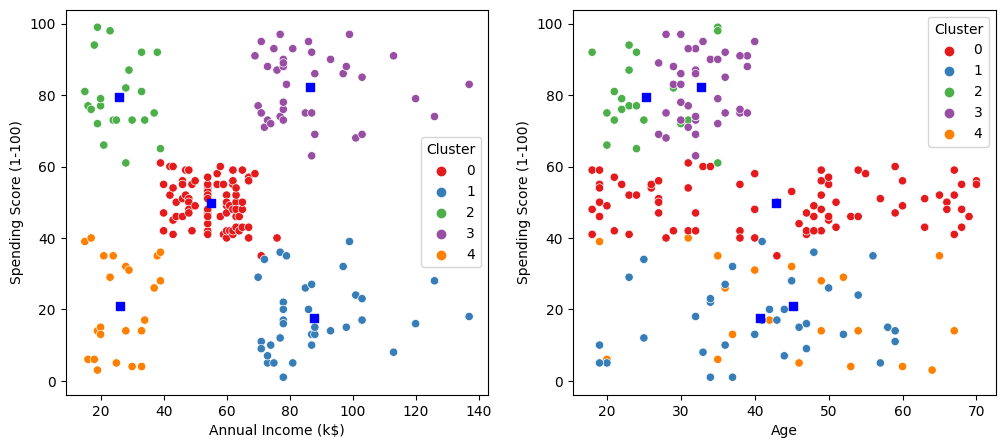

In [26]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x=KM5_clustered['Annual Income (k$)'],y=KM5_clustered['Spending Score (1-100)'], data=KM5_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x=KM5_clustered['Age'],y=KM5_clustered['Spending Score (1-100)'], data=KM5_clustered,
                hue='Cluster', ax=axes[1], palette='Set1', legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
plt.show()

K-Means algorithm generated the following 5 clusters:
- clients with <b>low</b> annual income and <b>high</b> spanding score
- clients with <b>medium</b> annual income and <b>medium</b> spanding score
- clients with <b>high</b> annual income and <b>low</b> spanding score
- clients with <b>high</b> annual income and <b>high</b> spanding score
- clients with <b>low</b> annual income and <b>low</b> spanding score

There are no distinct groups in terms of customer age.

Sizes of the clusters:

In [27]:
KM5_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM5_clust_sizes.columns = ["KM5_size"]
KM5_clust_sizes

,KM5_size
Cluster,
0,80
1,36
2,22
3,39
4,23


In [29]:
import plotly as py
import plotly.graph_objs as go
def tracer(db,n,name):
    '''This function returns trace object as Plotly'''
    return go.Scatter3d(
        x=db[db['Cluster']==n]['Age'],
        y=db[db['Cluster']==n]['Spending Score (1-100)'],
        z=db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name=name,
        marker = dict(
            size =5
        )
    )



trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data= [trace0,trace1,trace2,trace3,trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
        xaxis = dict(title='Age'),
        yaxis = dict(title='Spending Score'),
        zaxis = dict(title='Annual Income')
    )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

#### 6 Clusters

In [30]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K_means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

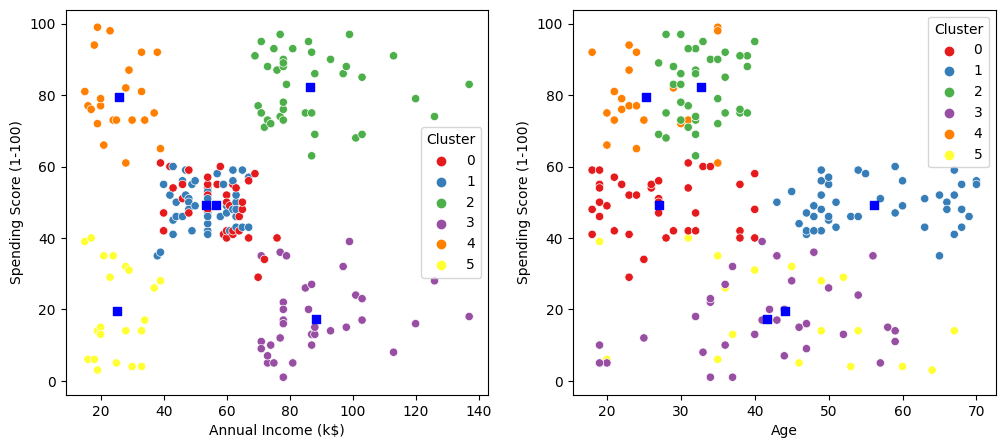

In [31]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x=KM6_clustered['Annual Income (k$)'],y=KM6_clustered['Spending Score (1-100)'], data=KM6_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x=KM6_clustered['Age'],y=KM6_clustered['Spending Score (1-100)'], data=KM6_clustered,
                hue='Cluster', ax=axes[1], palette='Set1', legend='full')

axes[0].scatter(KM_6_clusters.cluster_centers_[:,1],KM_6_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0],KM_6_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
plt.show()

K-Means algorithm generated the following 6 clusters:

- younger clients with <b>medium</b> annual income and <b>medium</b> spending score.
- clients with <b>high</b> annual income and <b>low</b> spending score.
- younger clients with <b>medium</b> annual income and <b>medium</b> spending score.
- clients with <b>high</b> annual income and <b>high</b> spending score.
- clients with <b>low</b> annual income and <b>low</b> spending score
- clients with <b>low</b> annual income and <b>high</b> spending score

In [32]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM6_size"]
KM6_clust_sizes

,KM6_size
Cluster,
0,38
1,45
2,39
3,35
4,22
5,21


In [33]:
# Plotly interactive 3d plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data= [trace0,trace1,trace2,trace3,trace4,trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
        xaxis = dict(title='Age'),
        yaxis = dict(title='Spending Score'),
        zaxis = dict(title='Annual Income')
    )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

To choose the best combination of the algorithm parameters, we will have to first create a matrix if investigated combinations.

In [36]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values,min_samples))

Collecting number of generated clusters

In [37]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0],min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics,DBS_clustering.labels_))

A heatplt below shows how many clusters were generated by the algorithm for the respective parameters combinations.

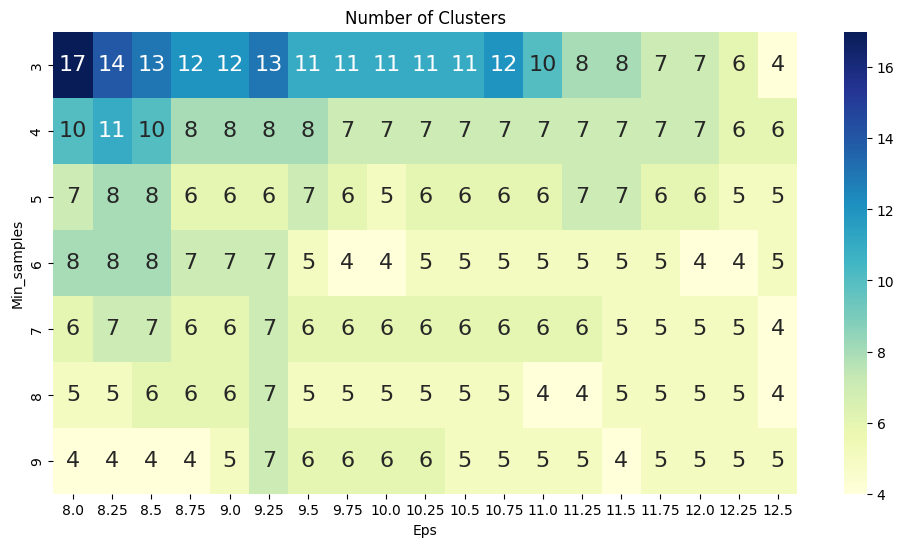

In [39]:
tmp = pd.DataFrame.from_records(DBSCAN_params,columns=['Eps','Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp,values='No_of_clusters',index='Min_samples', columns='Eps')

fig,ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1,annot=True,annot_kws={"size":16}, cmap="YlGnBu",ax=ax)
ax.set_title('Number of Clusters')
plt.show()

As the heatmap above shows, the number of clusters vary from 17 to 4.

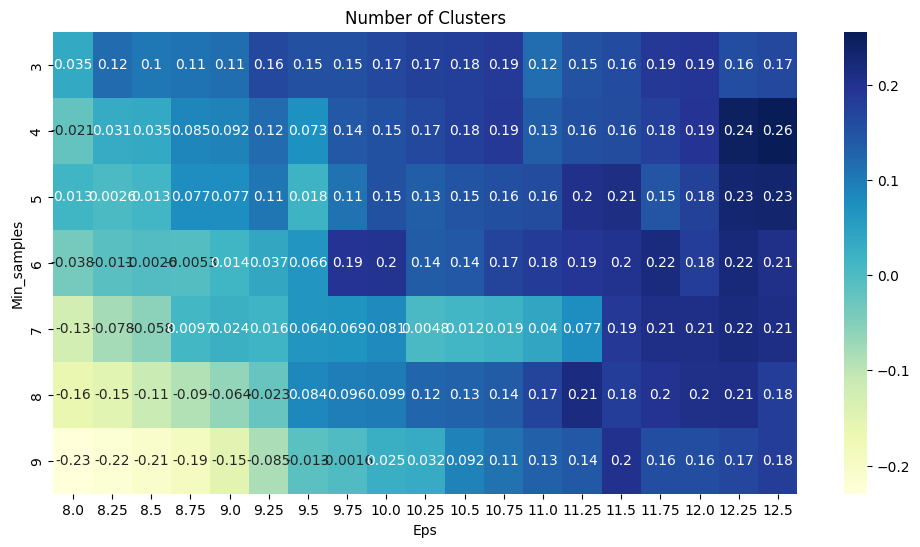

In [41]:
tmp = pd.DataFrame.from_records(DBSCAN_params,columns=['Eps','Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp,values='Sil_score',index='Min_samples', columns='Eps')

fig,ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1,annot=True,annot_kws={"size":10}, cmap="YlGnBu",ax=ax)
ax.set_title('Number of Clusters')
plt.show()

Glabal maximum is 0.26 for eps=12.5 and min_samples=4

In [42]:
DBS_clustering =DBSCAN(eps=12.5,min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

Cluster sizes

In [43]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ['DBSCAN_size']
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers.

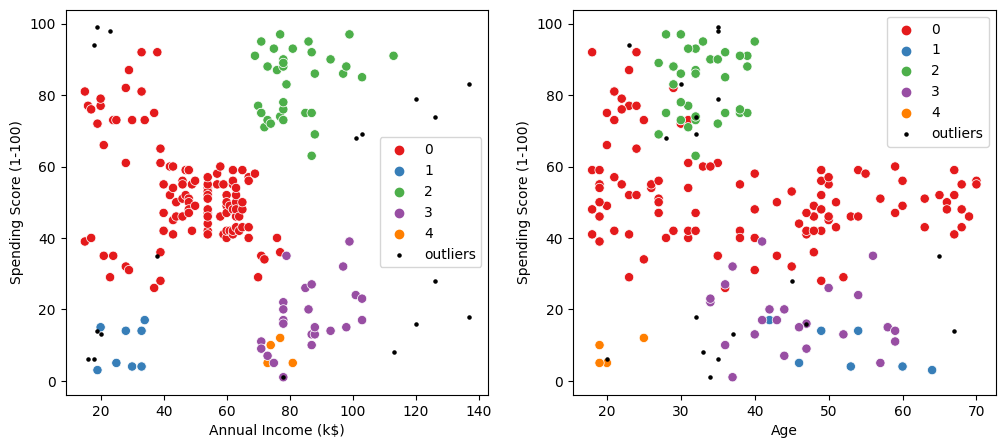

In [47]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[0], legend='full',s=45)

sns.scatterplot(x='Age',y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full',s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers',c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers',c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(),fontsize='10')
plt.setp(axes[1].get_legend().get_texts(),fontsize='10')

plt.show()

The above graph shows that there are some outliers - these points do not meet distance and minimum samples requirements to be recognised as a cluster

### MeanShift

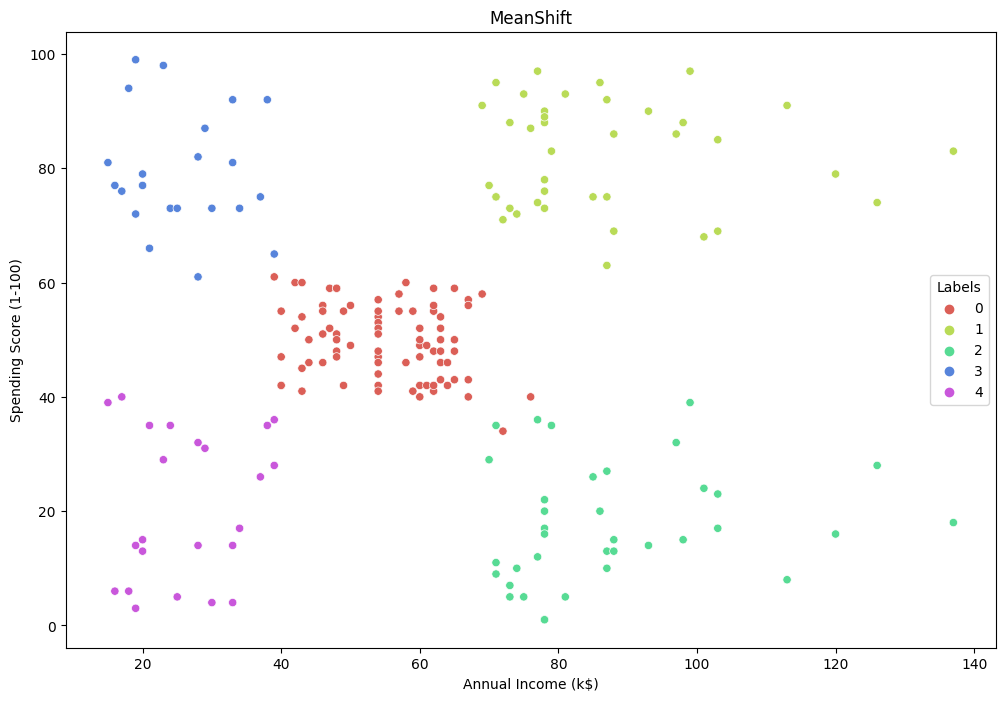

In [62]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_numerics,quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X_numerics)

X_numerics['Labels'] = ms.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_numerics['Annual Income (k$)'],y= X_numerics['Spending Score (1-100)'],hue = X_numerics['Labels'],
                palette=sns.color_palette('hls',np.unique(ms.labels_).shape[0]))

plt.plot()
plt.title('MeanShift')
plt.show()

In [63]:
MS_clustered = X_numerics.copy()
MS_clustered.loc[:,'Cluster'] = ms.labels_ # append labels to points

In [66]:
MS_clust_sizes = MS_clustered.groupby('Cluster').size().to_frame()
MS_clust_sizes.columns=['MS_size']
MS_clust_sizes

,MS_size
Cluster,
0,80
1,39
2,36
3,22
4,23


### Agglomerative Clustering

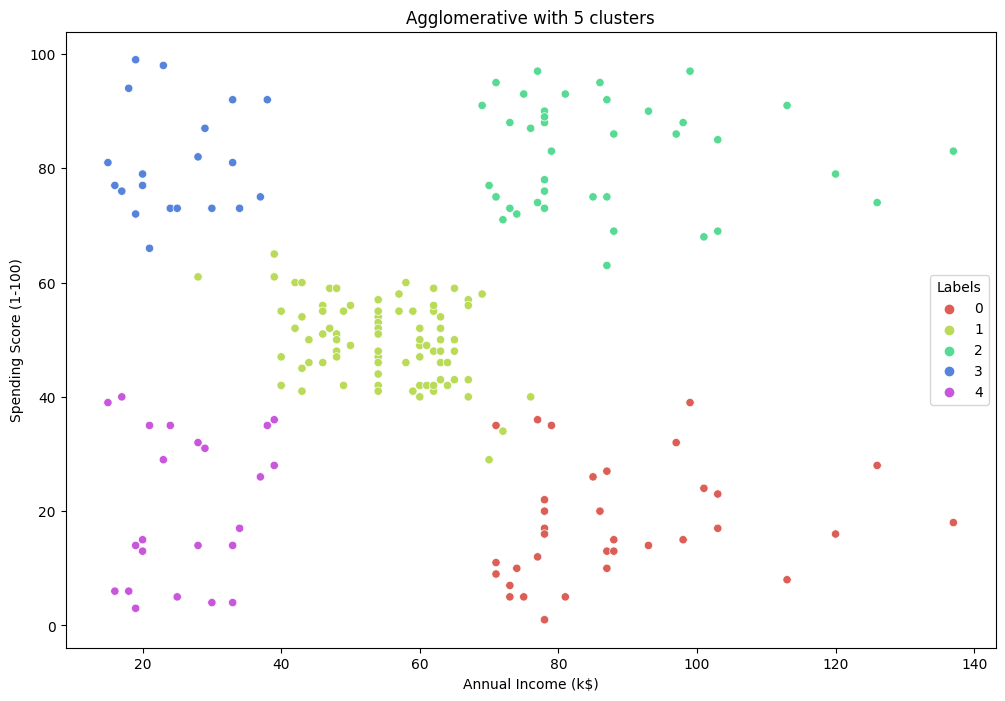

In [67]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5,linkage='average').fit(X_numerics)

X_numerics['Labels'] = agglom.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_numerics['Annual Income (k$)'],y=X_numerics['Spending Score (1-100)'],hue=X_numerics['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('Agglomerative with 5 clusters')
plt.show()

In [68]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X_numerics,X_numerics)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


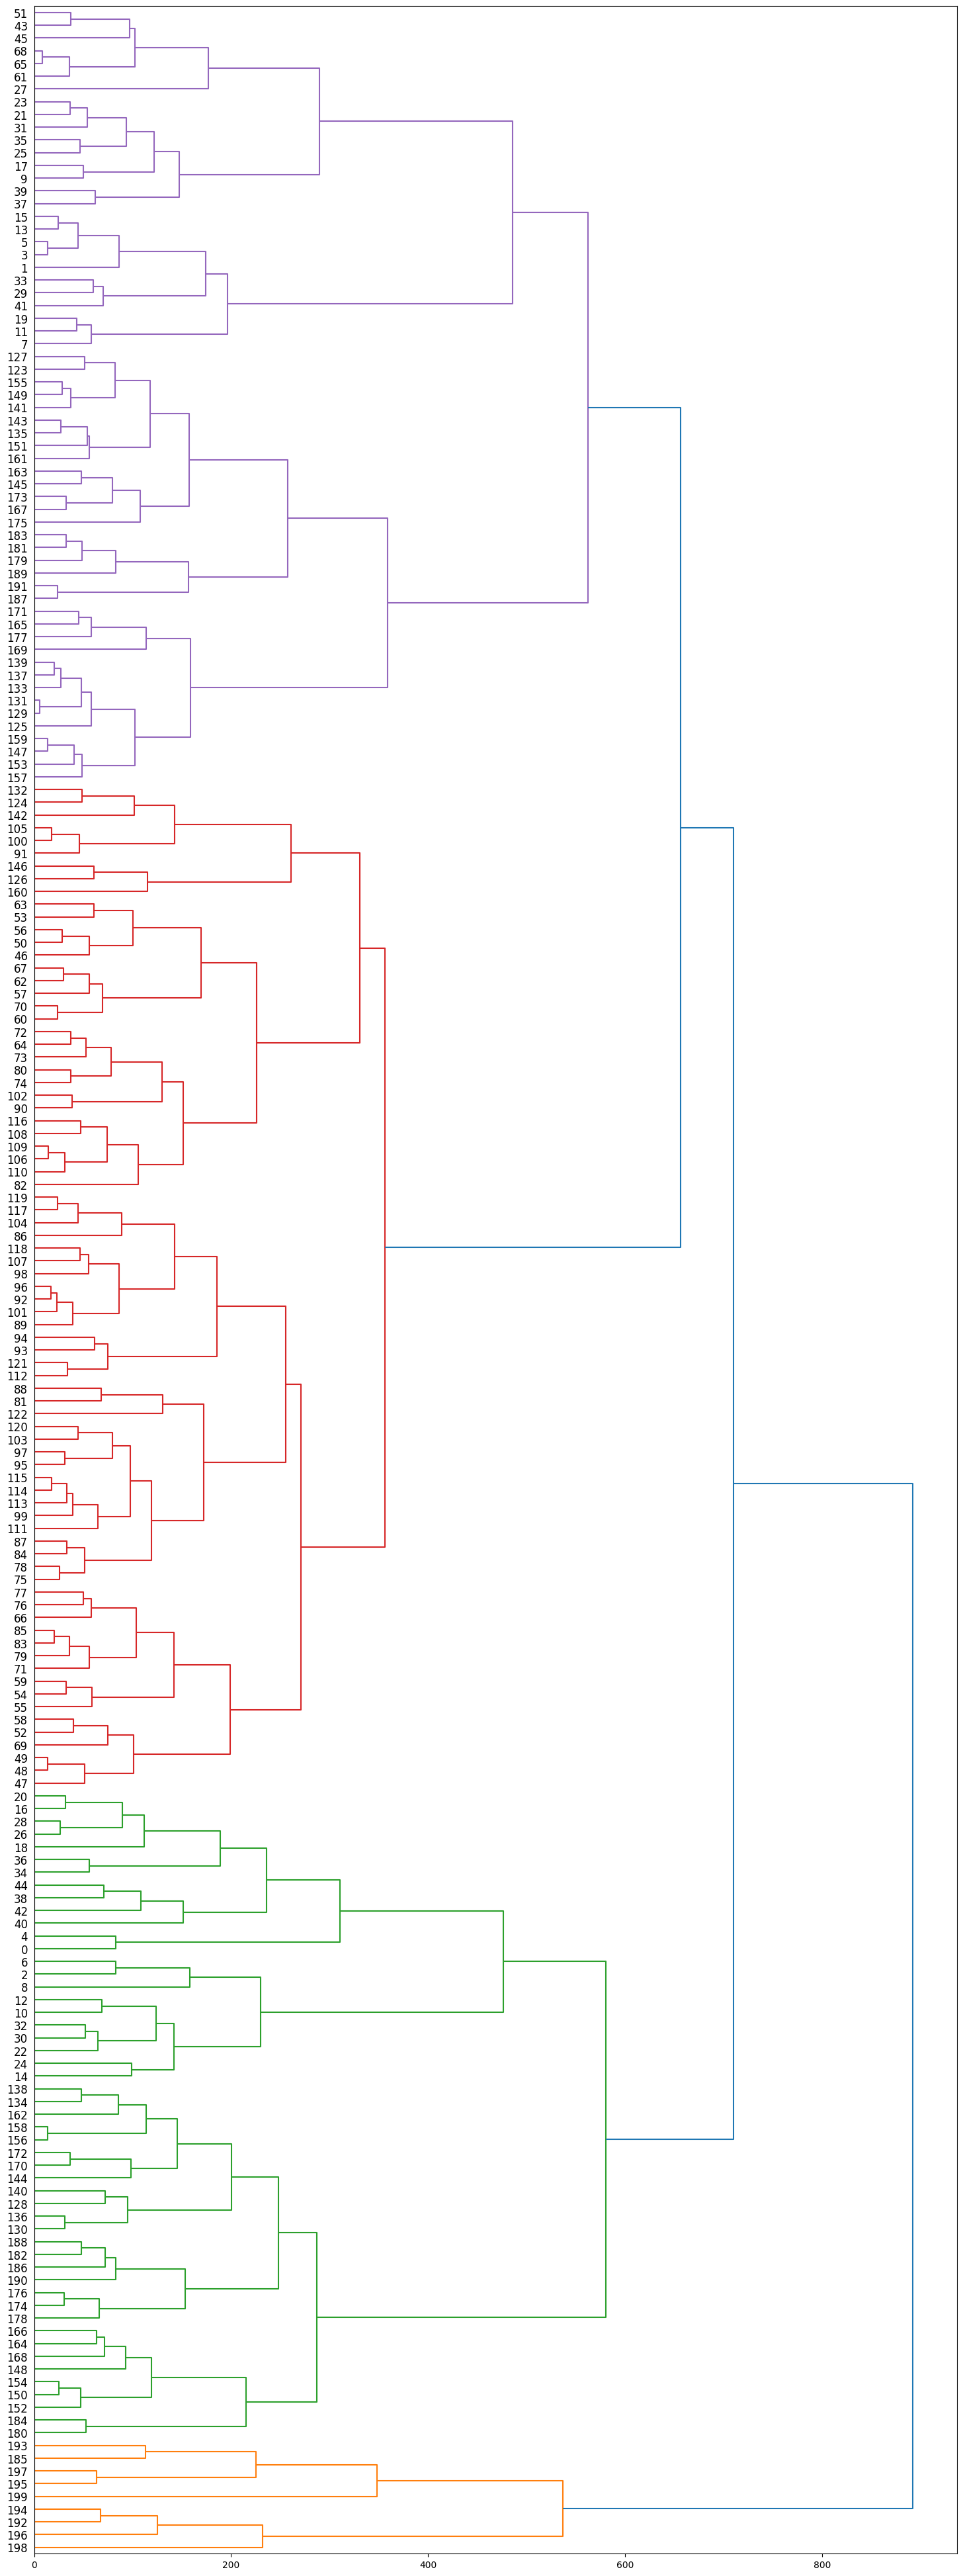

In [69]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z,leaf_rotation=0,leaf_font_size=12, orientation='right')

In [71]:
Agg_clustered = X_numerics.copy()
Agg_clustered.loc[:,'Cluster'] = agglom.labels_ # append labels to points

In [73]:
Agg_clust_sizes = Agg_clustered.groupby('Cluster').size().to_frame()
Agg_clust_sizes.columns = ['Agg_size']
Agg_clust_sizes

,Agg_size
Cluster,
0,35
1,83
2,39
3,20
4,23


Comparing the cluster sizes across all the algorithms

In [74]:
clusters = pd.concat([KM5_clust_sizes,KM6_clust_sizes,DBSCAN_clust_sizes,MS_clust_sizes,Agg_clust_sizes],axis=1,sort=False)
clusters

,KM5_size,KM6_size,DBSCAN_size,MS_size,Agg_size
Cluster,,,,,
0,80.0,38.0,112.0,80.0,35.0
1,36.0,45.0,8.0,39.0,83.0
2,22.0,39.0,34.0,36.0,39.0
3,39.0,35.0,24.0,22.0,20.0
4,23.0,22.0,4.0,23.0,23.0
5,NaN,21.0,NaN,NaN,NaN
-1,NaN,NaN,18.0,NaN,NaN


### Conclusion :

It seems KMeans with 6 clusters as more evenly balanced observations. DBSCAN on the other hand though was able to identify the outliers perfectly did not perform well as it failed in recognising clusters of various densities (which are present in this case). Another reason for DBSCAN not performing well is size of the data. DBSCAN is known to work great when the size of the data is large. The performance with KMeans with 5 clusters, MeanShift & Agglomerative algorithms were almost similar